# Potato classification Using Image Data Generators

In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [50]:
IMAGE_SIZE = 256
CHANNELS = 3
BATCH_SIZE = 32
N_CLASSES = 3

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset_potato_classified/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [7]:
train_generator.class_indices


{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [8]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.41432998 0.3986437  0.45746723]
  [0.4025484  0.38362718 0.4408332 ]
  [0.48831704 0.46478763 0.5196896 ]
  ...
  [0.6493126  0.64306647 0.73878103]
  [0.64636683 0.64096236 0.7375186 ]
  [0.6434211  0.6388582  0.7362561 ]]

 [[0.41769657 0.4020103  0.46083382]
  [0.4008651  0.3827855  0.44041237]
  [0.46811754 0.44458812 0.49949008]
  ...
  [0.6305544  0.6282269  0.7247568 ]
  [0.6322377  0.6286477  0.72223186]
  [0.63392097 0.6290685  0.7197069 ]]

 [[0.42106313 0.40537685 0.4642004 ]
  [0.3991818  0.38194385 0.43999153]
  [0.44791803 0.42438862 0.4792906 ]
  ...
  [0.6453968  0.6336321  0.7081419 ]
  [0.6466593  0.6348946  0.7094044 ]
  [0.6479218  0.6361571  0.7106669 ]]

 ...

 [[0.6929705  0.67728424 0.7321862 ]
  [0.6736127  0.65792644 0.7128284 ]
  [0.6542548  0.6385685  0.6934705 ]
  ...
  [0.72972304 0.72972304 0.77678186]
  [0.7498379  0.7498379  0.7968967 ]
  [0.7591874  0.7591874  0.8062462 ]]

 [[0.5735262  0.5624481  0.61735004]
  [0.5651097  0.5548733  0.60977525]


In [56]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset_potato_classified/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [54]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset_potato_classified/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


## Building the Model

In [13]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.Conv2D(32, kernel_size = (3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

## Compiling the Model

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 36s 686ms/step - loss: 0.9283 - accuracy: 0.4776 - val_loss: 0.9003 - val_accuracy: 0.4583
Epoch 2/20
47/47 [==============================] - 27s 569ms/step - loss: 0.8101 - accuracy: 0.5556 - val_loss: 0.5567 - val_accuracy: 0.7344
Epoch 3/20
47/47 [==============================] - 26s 557ms/step - loss: 0.5446 - accuracy: 0.7612 - val_loss: 0.5750 - val_accuracy: 0.7760
Epoch 4/20
47/47 [==============================] - 27s 576ms/step - loss: 0.3501 - accuracy: 0.8589 - val_loss: 0.3646 - val_accuracy: 0.8490
Epoch 5/20
47/47 [==============================] - 27s 578ms/step - loss: 0.2990 - accuracy: 0.8840 - val_loss: 0.3421 - val_accuracy: 0.8281
Epoch 6/20
47/47 [==============================] - 28s 597ms/step - loss: 0.2926 - accuracy: 0.8915 - val_loss: 0.4273 - val_accuracy: 0.8281
Epoch 7/20
47/47 [==============================] - 27s 566ms/step - loss: 0.2429 - accuracy: 0.9009 - val_loss: 0.2352 - val_accuracy: 0.8802

In [30]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 8s 592ms/step - loss: 0.1296 - accuracy: 0.9559


In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

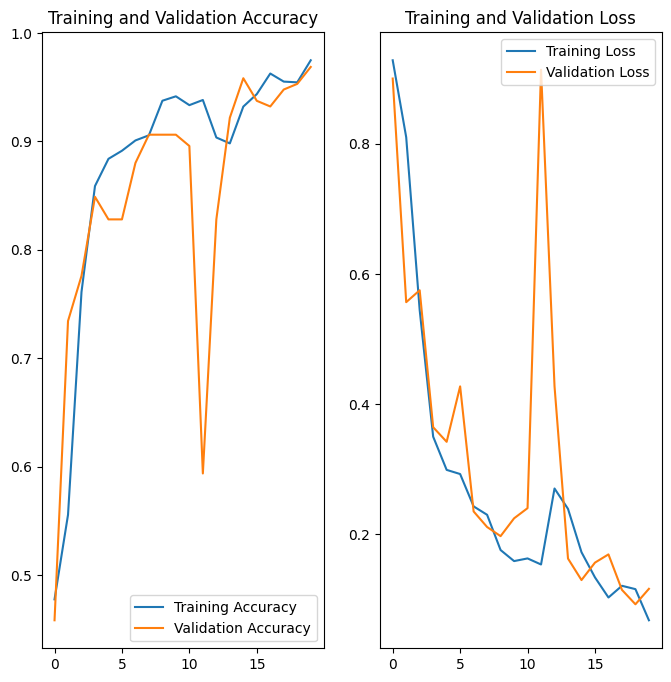

In [34]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 312ms/step
predicted label: Potato___Early_blight


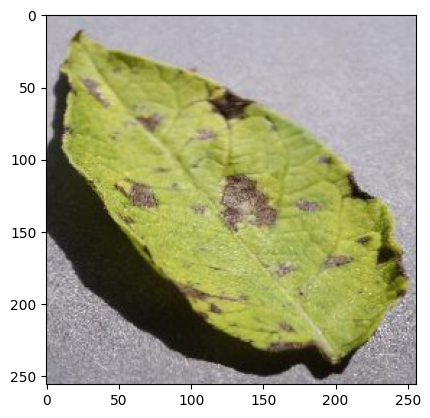

In [36]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [37]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 47ms/step


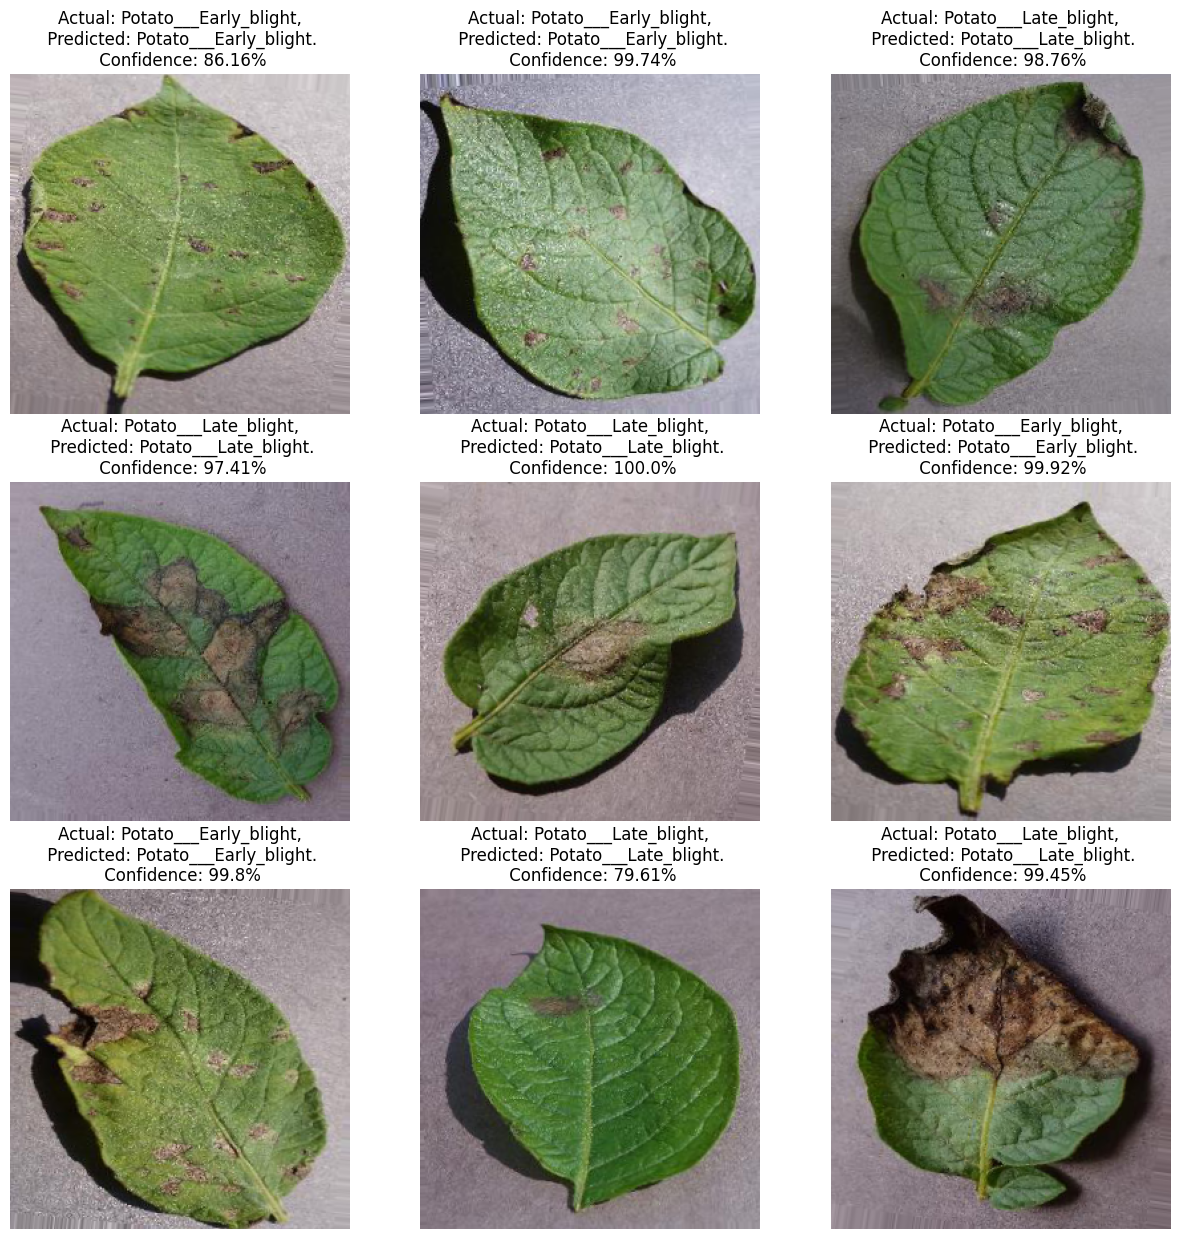

In [40]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [41]:
model.save("../potatoes.h5")

In [44]:
import os

In [46]:
model_version=2
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets
